# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
df = pd.read_csv('./previsao_de_renda.csv')


In [19]:
df1 = df[['data_ref','sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia']]
df1

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa


In [35]:
df2 = df1.copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


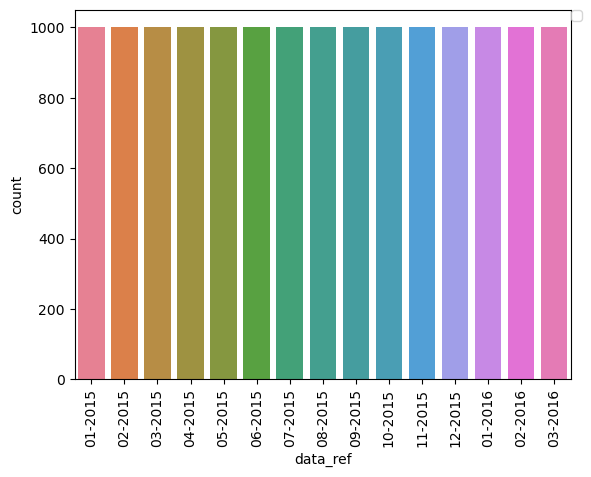

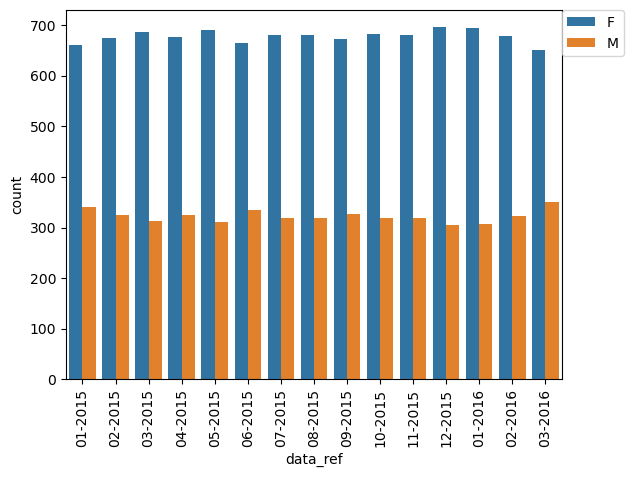

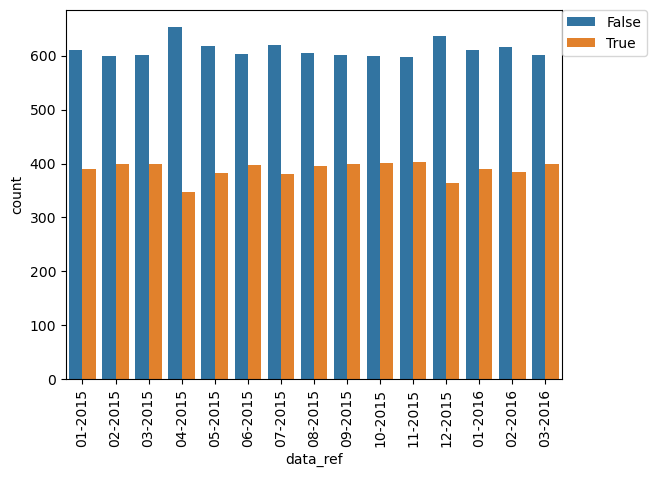

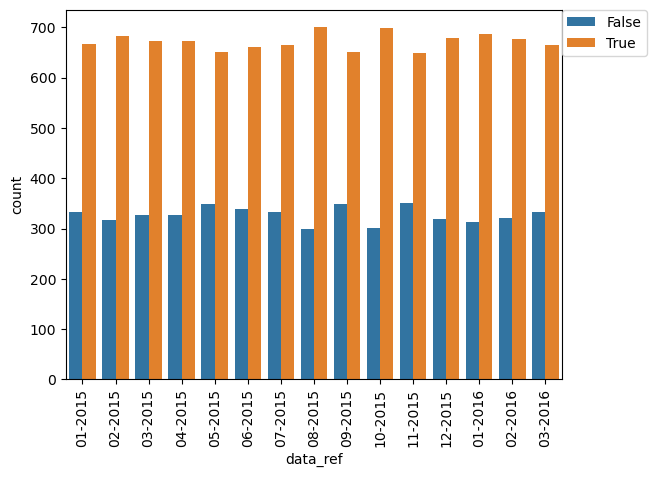

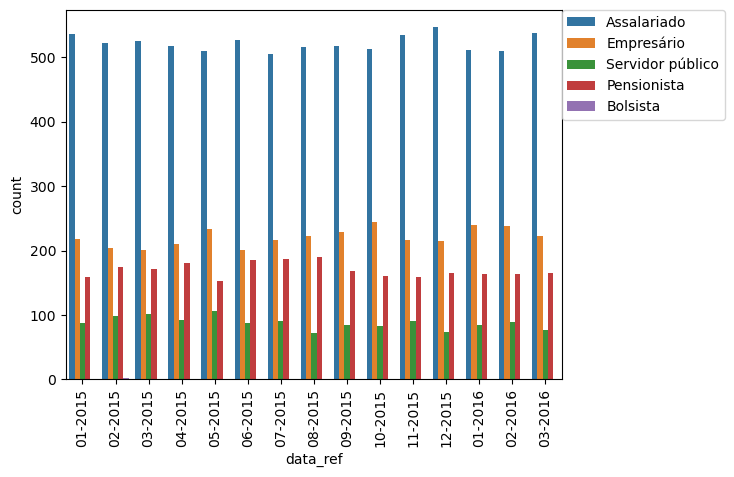

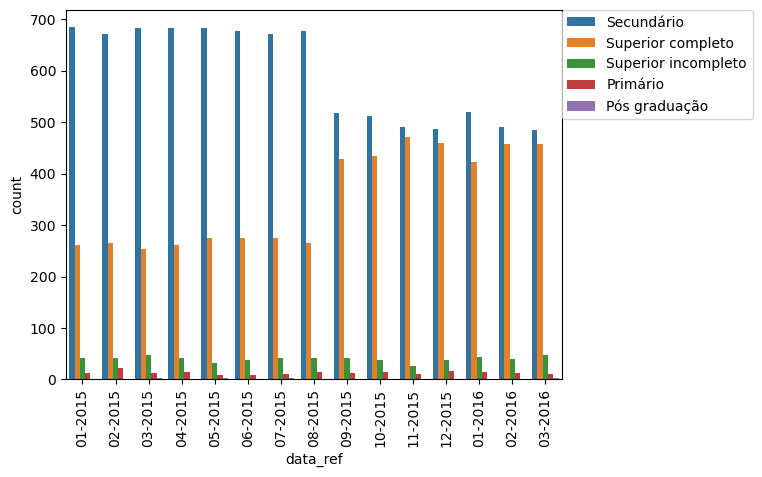

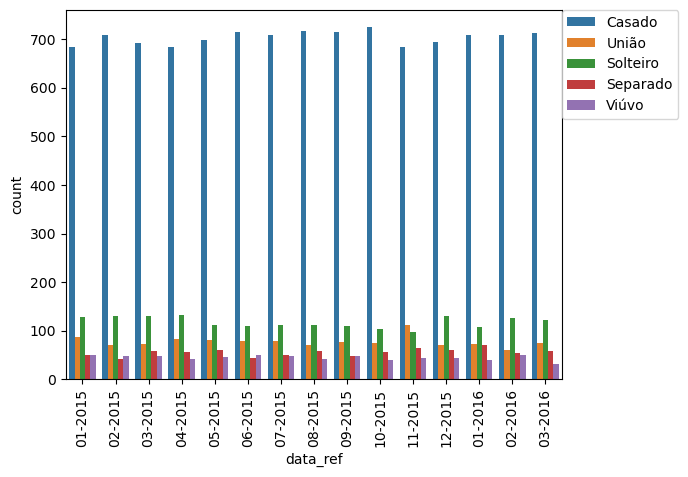

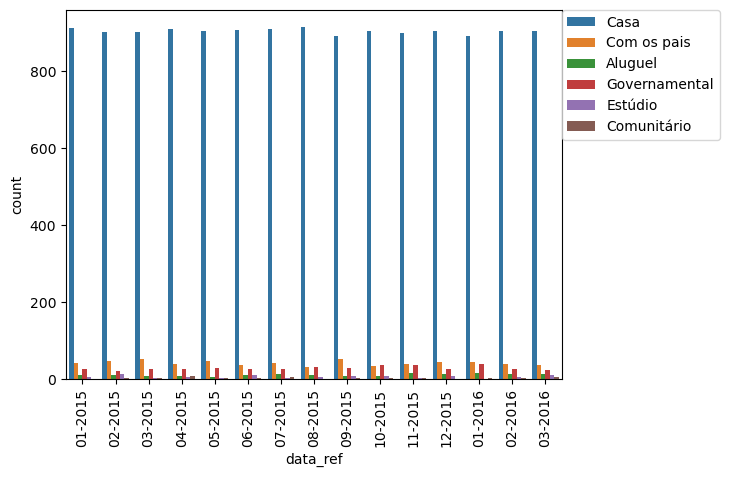

In [43]:
for i in df1:
    ax = sns.countplot(x='data_ref', hue=i, data=df2)

    tick_labs = df2['data_ref'].dt.strftime("%m-%Y").unique()
    
    ax.set_xticks(range(len(tick_labs)))
    ax.set_xticklabels(tick_labs, rotation=90)
    
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.show()


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

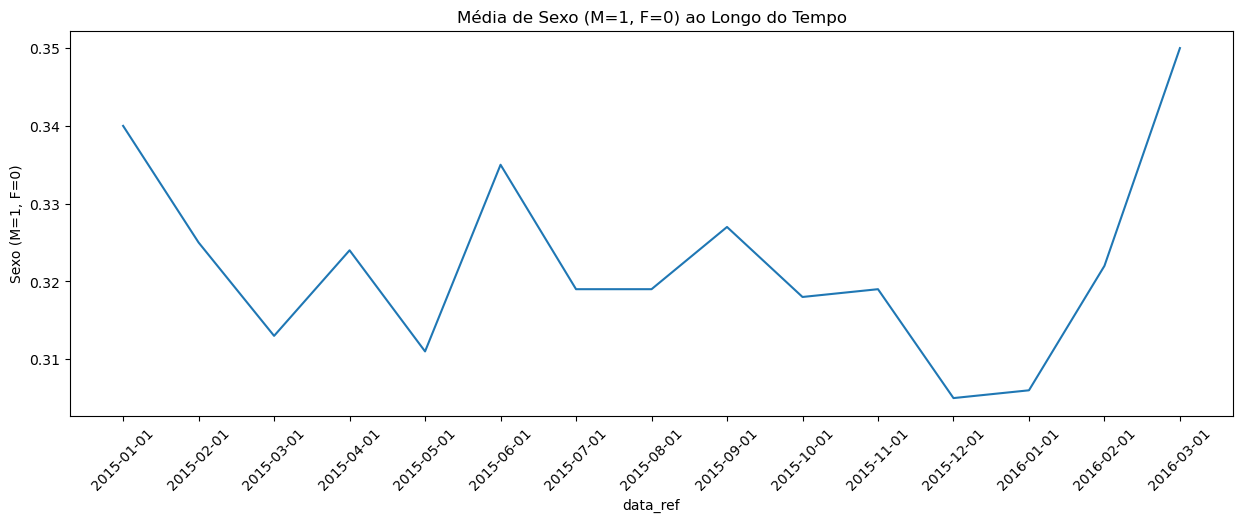

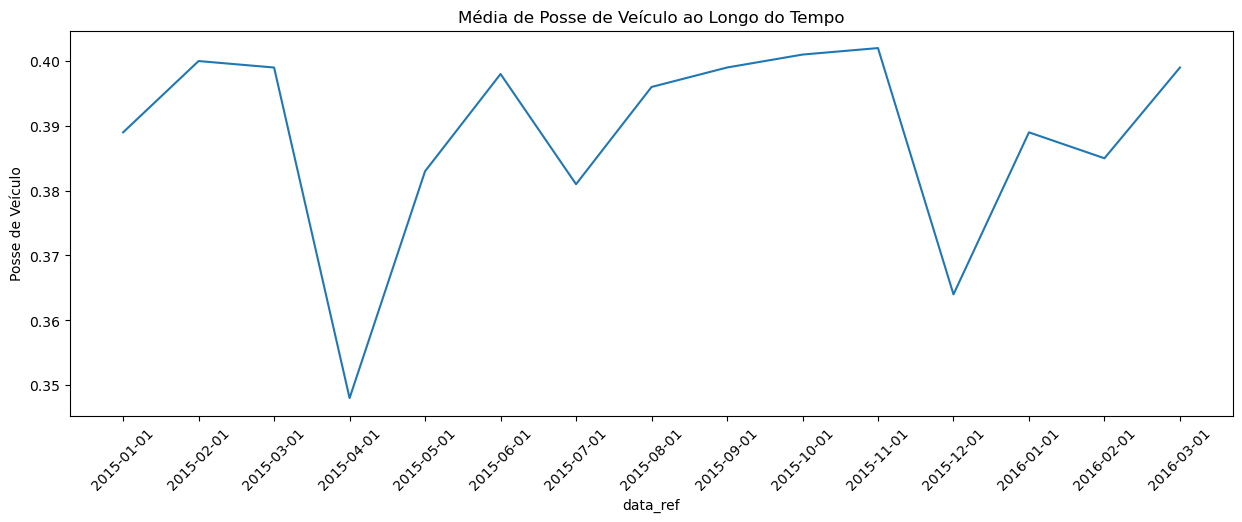

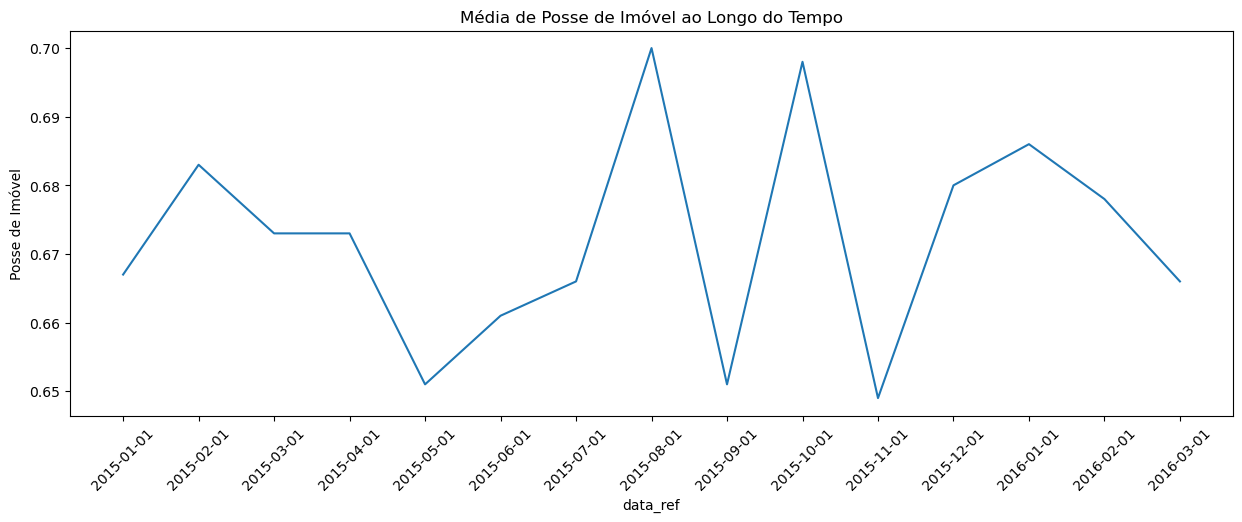

In [47]:
df['sexo_num'] = df['sexo'].map({'M': 1, 'F': 0})
df['posse_de_veiculo_num'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel_num'] = df['posse_de_imovel'].astype(int)

grouped = df[['data_ref', 'sexo_num', 'posse_de_veiculo_num', 'posse_de_imovel_num']].groupby('data_ref').mean().reset_index()

qualitative_vars = {
    'sexo_num': 'Sexo (M=1, F=0)',
    'posse_de_veiculo_num': 'Posse de Veículo',
    'posse_de_imovel_num': 'Posse de Imóvel'
}

for var, label in qualitative_vars.items():
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=grouped, x='data_ref', y=var)
    plt.title(f'Média de {label} ao Longo do Tempo')
    plt.xticks(rotation=45)
    plt.ylabel(label)
    plt.show()


As variáveis qualitativas podem ser úteis em modelagem porque, ao mostrarem variações ao longo do tempo, indicam que podem influenciar a variável de interesse. Sua relevância se baseia na relação lógica ou estatística com o que se deseja prever, e elas precisam ser codificadas (como one-hot encoding) para serem utilizadas em modelos. Muitos algoritmos, como árvores de decisão, lidam bem com essas variáveis, permitindo a identificação de sua importância preditiva. Por fim, validar o impacto dessas variáveis na performance do modelo é essencial para garantir que realmente contribuam para melhorias nas previsões.